In [1]:
import pandas as pd


In [154]:
import seaborn as sns

In [64]:
import matplotlib.pyplot as plt

# DATA CLEANING

In [66]:
df = pd.read_csv('customer_data portfolio_1.csv')
df

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,NaN,46952,College,North,Regular,occasional,19685,Clothing,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
99997,99996,31,Female,19691,College,West,Regular,occasional,7075,Health,0,7
99998,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5
99999,99998,29,Male,13222,College,West,Regular,frequent,5152,Clothing,0,5
100000,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5



 CHECK NULL VALUES


In [67]:
df.isna().sum()

id                    0
age                   0
gender                7
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    1
purchase_amount       0
product_category      2
promotion_usage       0
satisfaction_score    0
dtype: int64

FILL NULL VALUES

In [68]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [69]:
df['purchase_frequency'] = df['purchase_frequency'].fillna(df['purchase_frequency'].mode()[0])

In [70]:
df['product_category'] = df['product_category'].fillna(df['product_category'].mode()[0])

WE GOT 0 NULL VALUES 

In [71]:
df.isna().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

REVIEWING DATA TYPES OF EACH COLUMN


In [72]:
df.dtypes

id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

IDENTIFYING DUPLICATES

In [73]:
df.duplicated().sum()

17

DELETING DUPLICATE ROWS

In [74]:
df.drop_duplicates(inplace = True)

NOW WE GOT ZERO DUPLICATED ROWS

In [75]:
df.duplicated().sum()

0

RENAMING COLUMN NAMES APPROPRIATELY

In [76]:
df.rename(columns = {'education' : 'education-qualification'},inplace = True)
df

,id,age,gender,income,education-qualification,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Male,46952,College,North,Regular,occasional,19685,Clothing,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
99997,99996,31,Female,19691,College,West,Regular,occasional,7075,Health,0,7
99998,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5
99999,99998,29,Male,13222,College,West,Regular,frequent,5152,Clothing,0,5
100000,99999,31,Female,40093,Bachelor,West,Regular,frequent,16312,Health,1,5


# VAROUS ASPECTS OF DATA MANIPULATION

In [204]:
sort = df.sort_values(by = ['income','age'],ascending = [False,True])
sort

,id,age,gender,income,education-qualification,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
93805,93804,34,Male,50000,Masters,East,Regular,occasional,16837,Books,0,5
70110,70109,31,Male,49999,Bachelor,South,Silver,occasional,11518,Electronics,0,5
58038,58037,30,Female,49998,Bachelor,West,Gold,rare,15721,Food,1,7
36759,36758,20,Male,49997,College,West,Regular,rare,17770,Food,1,5
56203,56202,31,Female,49996,College,North,Regular,rare,18403,Food,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
97476,97475,30,Female,5001,Masters,North,Regular,frequent,1445,Health,1,4
67598,67597,32,Male,5001,College,East,Silver,rare,1680,Beauty,0,4
71170,71169,27,Female,5000,Masters,East,Regular,rare,1757,Health,0,7
66722,66721,28,Male,5000,College,West,Regular,occasional,1620,Electronics,0,5


FILTERING ROWS BASED ON CONDITIONS

In [78]:
males = df[df['gender'] == 'Male']
males

,id,age,gender,income,education-qualification,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Male,46952,College,North,Regular,occasional,19685,Clothing,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
99990,99989,26,Male,22252,Bachelor,South,Regular,frequent,7511,Health,1,3
99993,99992,37,Male,24100,Bachelor,East,Regular,frequent,10307,Clothing,0,4
99996,99995,30,Male,30740,HighSchool,South,Regular,frequent,12385,Clothing,0,5
99998,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5


In [79]:
male_satisfaction = males[males['satisfaction_score'] > 4]
male_satisfaction

,id,age,gender,income,education-qualification,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Male,46952,College,North,Regular,occasional,19685,Clothing,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
99984,99983,30,Male,42767,HighSchool,East,Gold,rare,18859,Food,0,5
99988,99987,27,Male,40669,Masters,West,Regular,frequent,18895,Books,0,5
99996,99995,30,Male,30740,HighSchool,South,Regular,frequent,12385,Clothing,0,5
99998,99997,36,Male,17428,HighSchool,South,Regular,rare,6873,Health,0,5


In [80]:
top = df.head(60)
top

,id,age,gender,income,education-qualification,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Male,46952,College,North,Regular,occasional,19685,Clothing,1,5
5,6,38,Male,7347,Bachelor,South,Silver,occasional,2822,Electronics,0,5
6,7,32,Male,8265,Bachelor,South,Silver,frequent,3293,Clothing,0,7
7,8,24,Male,47773,HighSchool,North,Regular,rare,21794,Books,0,5
8,8,24,Male,47773,HighSchool,North,Regular,rare,21795,Books,0,5
10,10,28,Male,24666,HighSchool,North,Regular,rare,8779,Food,0,6


FILTERING PARTICULAR DATAS

In [81]:
clothes_and_books = top[top['product_category'].isin(['Clothing','Books'])]
clothes_and_books

,id,age,gender,income,education-qualification,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
4,5,31,Male,46952,College,North,Regular,occasional,19685,Clothing,1,5
6,7,32,Male,8265,Bachelor,South,Silver,frequent,3293,Clothing,0,7
7,8,24,Male,47773,HighSchool,North,Regular,rare,21794,Books,0,5
8,8,24,Male,47773,HighSchool,North,Regular,rare,21795,Books,0,5
13,13,32,Male,6735,College,East,Silver,occasional,2450,Clothing,1,5
14,14,30,Female,19034,Bachelor,East,Regular,occasional,5579,Books,1,5
15,15,28,Male,35748,Bachelor,North,Silver,rare,12901,Books,1,3


SELECTING ROWS AND COLUMNS BY THEIR LABELS

In [82]:
df_1 = top.loc[0 : 5 ,['id','region','income','loyalty_status']]
df_1

,id,region,income,loyalty_status
0,1,East,40682,Gold
1,2,West,15317,Regular
2,3,West,38849,Silver
3,4,South,11568,Regular
4,5,North,46952,Regular
5,6,South,7347,Silver


SELECTING ROWS AND COLUMNS BY THEIR INTEGER POSITION

In [83]:
df_2 = top.iloc[0:5,0:3]
df_2

,id,age,gender
0,1,27,Male
1,2,29,Male
2,3,37,Male
3,4,30,Male
4,5,31,Male


# MERGING DATAFRAMES

JOING DATA FRAMES USING VARIOUS TYPES OF JOINS

In [85]:
join_dataframes = pd.merge(df_1 , df_2,on = 'id' , how = 'inner')
join_dataframes

,id,region,income,loyalty_status,age,gender
0,1,East,40682,Gold,27,Male
1,2,West,15317,Regular,29,Male
2,3,West,38849,Silver,37,Male
3,4,South,11568,Regular,30,Male
4,5,North,46952,Regular,31,Male


In [205]:
join_dataframes_left = pd.merge(df_1 , df_2,on = 'id' , how = 'left')
join_dataframes_left

,id,region,income,loyalty_status,age,gender
0,1,East,40682,Gold,27.0,Male
1,2,West,15317,Regular,29.0,Male
2,3,West,38849,Silver,37.0,Male
3,4,South,11568,Regular,30.0,Male
4,5,North,46952,Regular,31.0,Male
5,6,South,7347,Silver,NaN,NaN


In [206]:
join_dataframes_right = pd.merge(df_1 , df_2,on = 'id' , how = 'right')
join_dataframes_right

,id,region,income,loyalty_status,age,gender
0,1,East,40682,Gold,27,Male
1,2,West,15317,Regular,29,Male
2,3,West,38849,Silver,37,Male
3,4,South,11568,Regular,30,Male
4,5,North,46952,Regular,31,Male


In [207]:
join_dataframes_outer = pd.merge(df_1 , df_2,on = 'id' , how = 'outer')
join_dataframes_outer

,id,region,income,loyalty_status,age,gender
0,1,East,40682,Gold,27.0,Male
1,2,West,15317,Regular,29.0,Male
2,3,West,38849,Silver,37.0,Male
3,4,South,11568,Regular,30.0,Male
4,5,North,46952,Regular,31.0,Male
5,6,South,7347,Silver,NaN,NaN


# Exploratory Data Analysis Methods

In [90]:
top

,id,age,gender,income,education-qualification,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Male,46952,College,North,Regular,occasional,19685,Clothing,1,5
5,6,38,Male,7347,Bachelor,South,Silver,occasional,2822,Electronics,0,5
6,7,32,Male,8265,Bachelor,South,Silver,frequent,3293,Clothing,0,7
7,8,24,Male,47773,HighSchool,North,Regular,rare,21794,Books,0,5
8,8,24,Male,47773,HighSchool,North,Regular,rare,21795,Books,0,5
10,10,28,Male,24666,HighSchool,North,Regular,rare,8779,Food,0,6


CALCULATING PURCHASE FREQUENCY

In [91]:
purchase_frequency = top['purchase_frequency'].value_counts()
purchase_frequency

purchase_frequency
rare          40
frequent      10
occasional    10
Name: count, dtype: int64

CALCULATING FREQUENCY PERCENTAGE

In [92]:
frequency_percentage = ( purchase_frequency / len(top) ) * 100
frequency_percentage

purchase_frequency
rare          66.666667
frequent      16.666667
occasional    16.666667
Name: count, dtype: float64

REVIEWING THE DESCRIPTIVE STATISTICS

In [93]:
round(top.describe())

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,60.0,60.0,60.0,60.0,60.0,60.0
mean,28.0,29.0,29008.0,17778.0,2.0,7.0
std,14.0,4.0,11999.0,10380.0,3.0,3.0
min,1.0,21.0,6735.0,2080.0,0.0,3.0
25%,16.0,27.0,25878.0,9428.0,0.0,5.0
50%,30.0,28.0,27652.0,16470.0,1.0,6.0
75%,42.0,32.0,39021.0,30286.0,6.0,11.0
max,42.0,38.0,49088.0,30301.0,6.0,11.0


USING GROUPBY TO GROUP DATA WITH AGGREGATE FUNCTIONS

In [94]:
top.groupby('region')['purchase_frequency'].count()

region
East     11
North    31
South     6
West     12
Name: purchase_frequency, dtype: int64

CREATING PIVOT TABLE TO SUMMARIZE THE DATA

In [209]:
pivot_table = top.pivot_table(index = 'gender' , values = ['purchase_amount','income','satisfaction_score'],
                aggfunc = {'purchase_amount' : 'mean' ,'income' : 'mean' , 'satisfaction_score' : 'mean' ,'gender' : 'count'})

RENAMING PIVOT TABLE COLUMNS

In [96]:
pivot_table = pivot_table.rename(columns = {'income' : 'Avg-income','purchase_amount' : 'Avg-purchase_amount',
                                                        'satisfaction_score' : 'Avg-satisfaction_score'})
pivot_table

,gender,Avg-income,Avg-purchase_amount,Avg-satisfaction_score
gender,,,,
Female,13,24357.000000,8448.538462,5.307692
Male,47,30293.808511,20358.680851,7.914894


CROSS TABULATION FOR COMBINING COLUMNS

In [97]:
pd.crosstab(top['region'],top['purchase_frequency'])

purchase_frequency,frequent,occasional,rare
region,,,
East,5,3,3
North,1,3,27
South,2,1,3
West,2,3,7


FILTERING ONLY NUMERIC COLUMNS FROM THE DATASET

In [98]:
numeric_column = top.select_dtypes(include = ['number'])
numeric_column

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
0,1,27,40682,18249,0,6
1,2,29,15317,4557,1,6
2,3,37,38849,11822,0,6
3,4,30,11568,4098,0,7
4,5,31,46952,19685,1,5
5,6,38,7347,2822,0,5
6,7,32,8265,3293,0,7
7,8,24,47773,21794,0,5
8,8,24,47773,21795,0,5
10,10,28,24666,8779,0,6


CORRELATION TO FIND THE RELATIONSHIP BETWEEN VARIABLES  

In [152]:
corr = round(numeric_column.corr(),3)
corr

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
id,1.000,-0.267,-0.038,0.670,0.775,0.724
age,-0.267,1.000,-0.075,-0.429,-0.394,-0.297
income,-0.038,-0.075,1.000,0.403,-0.042,-0.112
purchase_amount,0.670,-0.429,0.403,1.000,0.876,0.818
promotion_usage,0.775,-0.394,-0.042,0.876,1.000,0.948
satisfaction_score,0.724,-0.297,-0.112,0.818,0.948,1.000


# data visualization

In [102]:
top

,id,age,gender,income,education-qualification,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Male,46952,College,North,Regular,occasional,19685,Clothing,1,5
5,6,38,Male,7347,Bachelor,South,Silver,occasional,2822,Electronics,0,5
6,7,32,Male,8265,Bachelor,South,Silver,frequent,3293,Clothing,0,7
7,8,24,Male,47773,HighSchool,North,Regular,rare,21794,Books,0,5
8,8,24,Male,47773,HighSchool,North,Regular,rare,21795,Books,0,5
10,10,28,Male,24666,HighSchool,North,Regular,rare,8779,Food,0,6


# What is the distribution of age and gender among customers?

In [105]:
gender = top.groupby('gender')['age'].count()
gender

gender
Female    13
Male      47
Name: age, dtype: int64

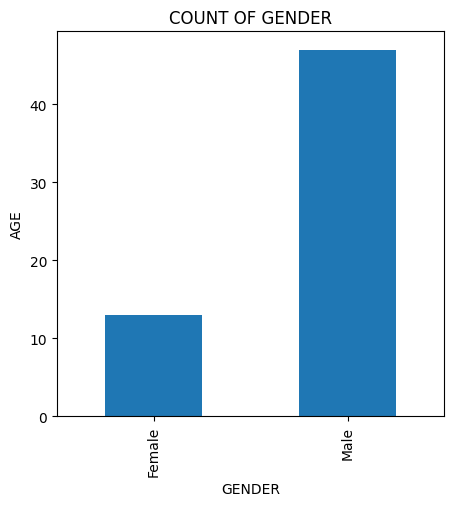

In [108]:
plt.figure(figsize = (5,5))
gender.plot(kind = 'bar' )
plt.title('COUNT OF GENDER')
plt.xlabel('GENDER')
plt.ylabel('AGE')
plt.show()

# How does purchase amount relate to satisfaction score?

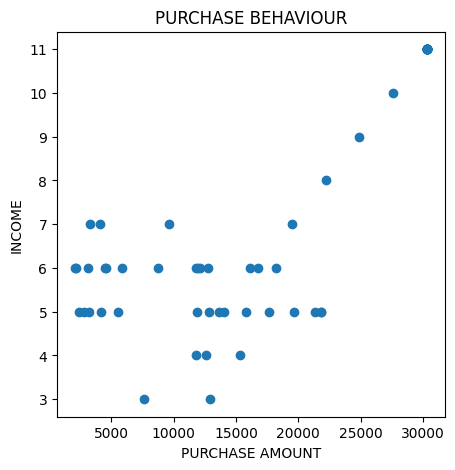

In [210]:
plt.figure(figsize = (5,5))
plt.scatter(top['purchase_amount'],top['satisfaction_score'])
plt.title('PURCHASE BEHAVIOUR')
plt.xlabel('PURCHASE AMOUNT')
plt.ylabel('INCOME')
plt.show()

# Which product categories are most popular among different loyalty statuses?

In [129]:
pl = pd.crosstab(top['product_category'] , top['loyalty_status'])
pl

loyalty_status,Gold,Regular,Silver
product_category,,,
Beauty,0,1,1
Books,1,3,1
Clothing,1,6,5
Electronics,1,27,7
Food,0,6,0


<Figure size 800x800 with 0 Axes>

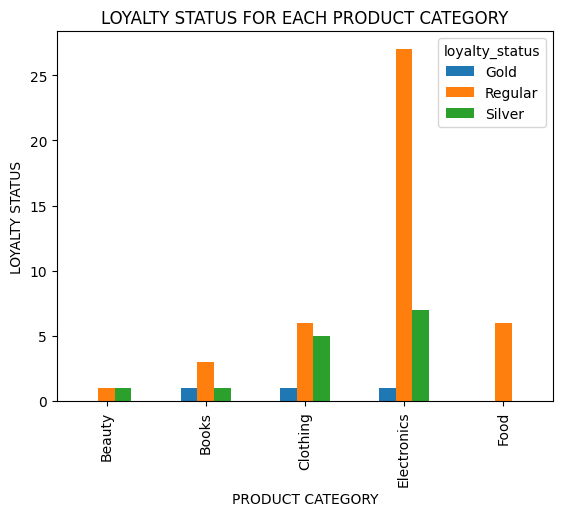

In [200]:
plt.figure(figsize = (8,8))
pl.plot(kind = 'bar' , stacked = False)
plt.title('LOYALTY STATUS FOR EACH PRODUCT CATEGORY')
plt.xlabel('PRODUCT CATEGORY')
plt.ylabel('LOYALTY STATUS')
plt.show()


# what is the percentage of purchase frequency?

In [132]:
frequency_percentage

purchase_frequency
rare          66.666667
frequent      16.666667
occasional    16.666667
Name: count, dtype: float64

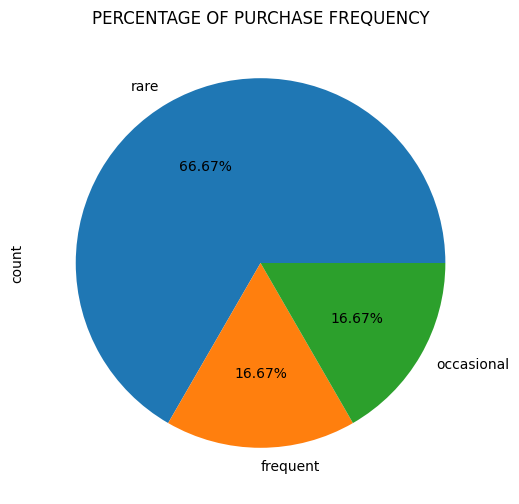

In [201]:
plt.figure(figsize = (8,6))
frequency_percentage.plot(kind = 'pie' , autopct = '%1.2f%%')
plt.title('PERCENTAGE OF PURCHASE FREQUENCY')
plt.show()


# Which product categories are most popular among different loyalty statuses?

<Figure size 500x500 with 0 Axes>

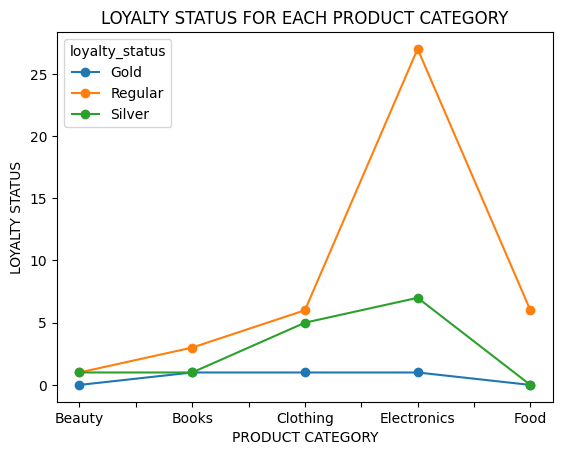

In [149]:
plt.figure(figsize = (5,5))
pl.plot(kind = 'line' , marker = 'o')
plt.title('LOYALTY STATUS FOR EACH PRODUCT CATEGORY')
plt.xlabel('PRODUCT CATEGORY')
plt.ylabel('LOYALTY STATUS')
plt.show()

# what is the distribution of age of the customers ?

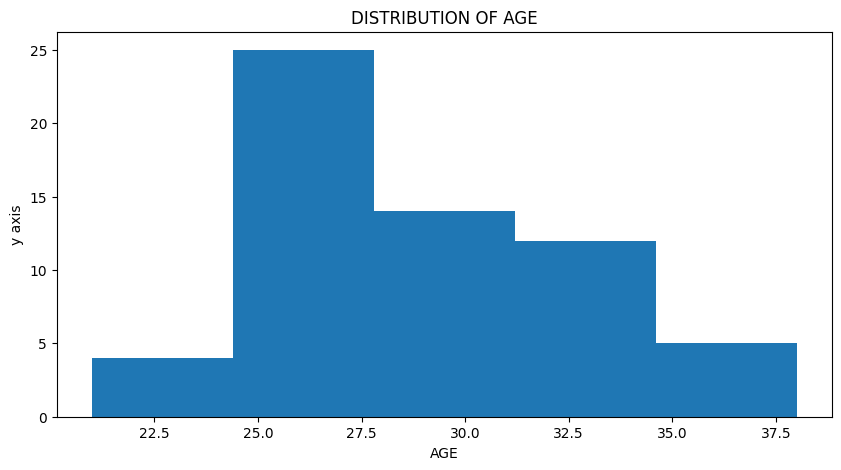

In [151]:
plt.figure(figsize = (10,5))
top['age'].plot(kind = 'hist' , bins = 5)
plt.title('DISTRIBUTION OF AGE')
plt.xlabel('AGE')
plt.ylabel('y axis')
plt.show()

# what is the strength of correlation ?

In [153]:
corr

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
id,1.000,-0.267,-0.038,0.670,0.775,0.724
age,-0.267,1.000,-0.075,-0.429,-0.394,-0.297
income,-0.038,-0.075,1.000,0.403,-0.042,-0.112
purchase_amount,0.670,-0.429,0.403,1.000,0.876,0.818
promotion_usage,0.775,-0.394,-0.042,0.876,1.000,0.948
satisfaction_score,0.724,-0.297,-0.112,0.818,0.948,1.000


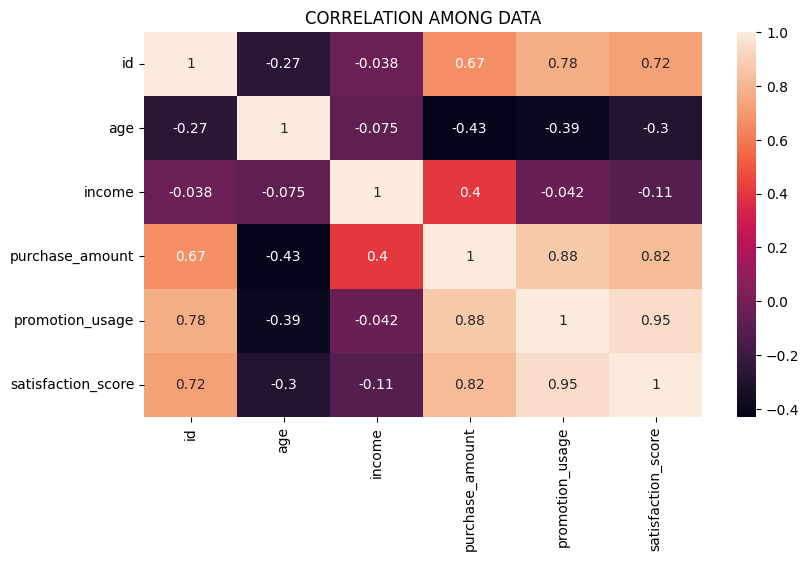

In [161]:
plt.figure(figsize = (9,5))
sns.heatmap(corr,annot = True)
plt.title('CORRELATION AMONG DATA')
plt.show()          
# the values which are near to 1 are considered as positive correlation which are lower are considered as negative correaltion

# Which education qualification has the most income level?

In [186]:
gc = top.groupby('education-qualification')['income'].sum()
gc

education-qualification
Bachelor      513127
College       956318
HighSchool    216401
Masters        54604
Name: income, dtype: int64

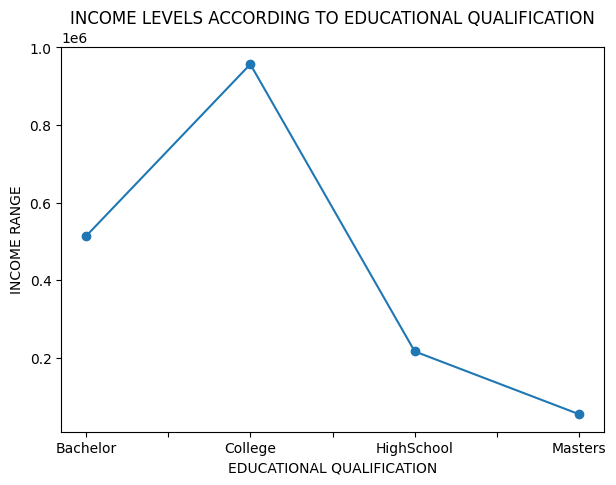

In [192]:
plt.figure(figsize = (7,5))
gc.plot(kind = 'line' , marker = 'o')
plt.title('INCOME LEVELS ACCORDING TO EDUCATIONAL QUALIFICATION')
plt.xlabel('EDUCATIONAL QUALIFICATION')
plt.ylabel('INCOME RANGE')
plt.show()

# HOW DOES PURCHASE AMOUNT VARIES FOR DIFFERENT REGION

In [194]:
region_purchase = top.groupby('region')['purchase_amount'].sum()
region_purchase

region
East     135398
North    774774
South     59533
West      96984
Name: purchase_amount, dtype: int64

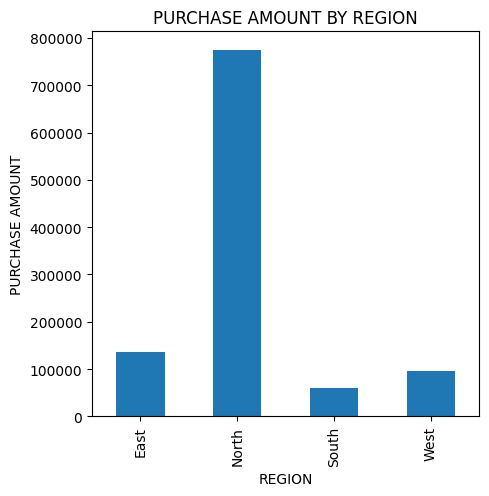

In [196]:
plt.figure(figsize = (5,5))
region_purchase.plot(kind = 'bar' )
plt.title('PURCHASE AMOUNT BY REGION')
plt.xlabel('REGION')
plt.ylabel('PURCHASE AMOUNT')
plt.show()

# **************************************************************************************************************